In [2]:
import sys
sys.path.insert(0, '../') # Loading utils
import utils

In [48]:
from __future__ import print_function, division
from builtins import range

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers

In [8]:
def getAction(s,w): 
    ''' Defines the policy. Returns an action given state and parameters.'''
    return 1 if s.dot(w) > 0 else 0

In [23]:
def playOneEpisode(env, params):
    ''' Plays single episode given parameters'''
    observation = env.reset()
    done = False
    t = 0
    
    while t < 10000:
        t += 1
        action = getAction(observation,params)
        observation, reward, done, _ = env.step(action)
        if done:
            break
    return t

In [33]:
def playMultipleEpisodes(env, numEpisodes, params):
    '''Plays muiltple episodes and returns average time taken for episodes '''
    episodeLenths = np.empty(numEpisodes)
    
    for e in range(numEpisodes):
        episodeLenths[e] = playOneEpisode(env, params)
    
    averageLen = np.mean(episodeLenths)
    return averageLen

In [44]:
def randomSearch(env, numEpisodesToPlay):
  ''' Randomly generates the params and plays the game '''
  episode_lengths = []
  best = 0
  params = None
  for t in range(numEpisodesToPlay):
    new_params = np.random.random(4)*2 - 1
    avg_length = playMultipleEpisodes(env, 100, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  return episode_lengths, params


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


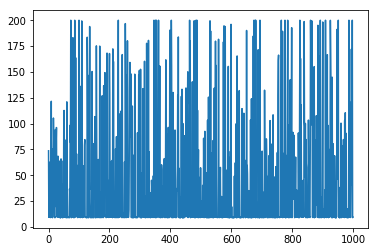

***Final run with final weights***


200.0

In [45]:
env = gym.make('CartPole-v0')
episode_lengths, params = randomSearch(env, 1000)
plt.plot(episode_lengths)
plt.show()

# play a final set of episodes
print("***Final run with final weights***")
playMultipleEpisodes(env, 100, params)


(array([569.,  86.,  87.,  65.,  44.,  26.,  24.,  24.,  23.,  52.]),
 array([  8.75 ,  27.875,  47.   ,  66.125,  85.25 , 104.375, 123.5  ,
        142.625, 161.75 , 180.875, 200.   ]),
 <a list of 10 Patch objects>)

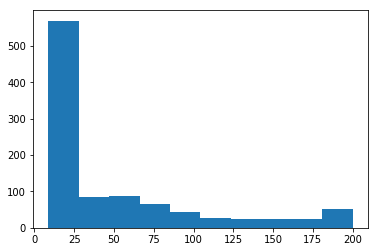

In [46]:
plt.hist(episode_lengths)

In [51]:
# Try wrappers for dumping videos
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, 'wrappers_dump')

# play a final set of episodes
print("***Final run with final weights***")
playMultipleEpisodes(env, 100, params)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
***Final run with final weights***


200.0